## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('QueryResults.csv')
df = df.rename(columns={"m": "Date", "TagName": "Tag", 'Unnamed: 2':'Posts'})

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [137]:
df

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,164
3,2008-08-01 00:00:00,c,83
4,2008-08-01 00:00:00,python,122
...,...,...,...
2239,2022-01-01 00:00:00,r,4457
2240,2022-01-01 00:00:00,go,892
2241,2022-01-01 00:00:00,python,25098
2242,2022-01-01 00:00:00,ruby,501


**Challenge**: Examine the first 5 rows and the last 5 rows of the dataframe

In [138]:

df.tail()

,Date,Tag,Posts
2239,2022-01-01 00:00:00,r,4457
2240,2022-01-01 00:00:00,go,892
2241,2022-01-01 00:00:00,python,25098
2242,2022-01-01 00:00:00,ruby,501
2243,2022-01-01 00:00:00,swift,2195


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [139]:
df.columns


Index(['Date', 'Tag', 'Posts'], dtype='object')

**Challenge**: Count the number of entries in each column of the dataframe

In [140]:
df['Date'].shape

(2244,)

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [221]:
df_all_posts= df[1054:1571].groupby('Tag').sum()
# df_all_posts.loc[df_all_posts['Posts']==787915]
# df.loc[df['Date']=='2018-01-01']

,Posts
Tag,
javascript,787915


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [142]:
df.groupby('Tag').count()


,Date,Posts
Tag,,
assembly,162,162
c,162,162
c#,163,163
c++,162,162
delphi,162,162
go,147,147
java,162,162
javascript,162,162
perl,162,162


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [143]:
df.Date


0       2008-07-01 00:00:00
1       2008-08-01 00:00:00
2       2008-08-01 00:00:00
3       2008-08-01 00:00:00
4       2008-08-01 00:00:00
               ...         
2239    2022-01-01 00:00:00
2240    2022-01-01 00:00:00
2241    2022-01-01 00:00:00
2242    2022-01-01 00:00:00
2243    2022-01-01 00:00:00
Name: Date, Length: 2244, dtype: object

In [144]:
df['Date'] = pd.to_datetime(df['Date'])
type(df['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [145]:
df


,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,164
3,2008-08-01,c,83
4,2008-08-01,python,122
...,...,...,...
2239,2022-01-01,r,4457
2240,2022-01-01,go,892
2241,2022-01-01,python,25098
2242,2022-01-01,ruby,501


## Data Manipulation

In [146]:
reshaped_df = df.pivot(index='Date', columns='Tag', values='Posts')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [147]:
reshaped_df.shape


(163, 14)

In [148]:
reshaped_df.head()


Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN


In [149]:
reshaped_df.tail()


Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2021-09-01,197.0,1802.0,5761.0,3916.0,143.0,659.0,7798.0,16682.0,114.0,4317.0,21942.0,4328.0,507.0,1936.0
2021-10-01,223.0,2207.0,6044.0,4090.0,150.0,761.0,7800.0,16239.0,131.0,4291.0,22991.0,4749.0,480.0,1852.0
2021-11-01,312.0,2346.0,6419.0,4185.0,151.0,710.0,8319.0,15892.0,81.0,4151.0,23502.0,4640.0,449.0,1767.0
2021-12-01,289.0,2269.0,5769.0,3893.0,158.0,775.0,7597.0,15391.0,103.0,3776.0,22202.0,3934.0,437.0,1677.0
2022-01-01,272.0,2266.0,6584.0,4361.0,159.0,892.0,8684.0,18012.0,141.0,4905.0,25098.0,4457.0,501.0,2195.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [150]:
reshaped_df.count()

Tag
assembly      162
c             162
c#            163
c++           162
delphi        162
go            147
java          162
javascript    162
perl          162
php           162
python        162
r             160
ruby          162
swift         154
dtype: int64

In [151]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,164.0,28.0,160.0,122.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,197.0,1802.0,5761.0,3916.0,143.0,659.0,7798.0,16682.0,114.0,4317.0,21942.0,4328.0,507.0,1936.0
2021-10-01,223.0,2207.0,6044.0,4090.0,150.0,761.0,7800.0,16239.0,131.0,4291.0,22991.0,4749.0,480.0,1852.0
2021-11-01,312.0,2346.0,6419.0,4185.0,151.0,710.0,8319.0,15892.0,81.0,4151.0,23502.0,4640.0,449.0,1767.0


In [152]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

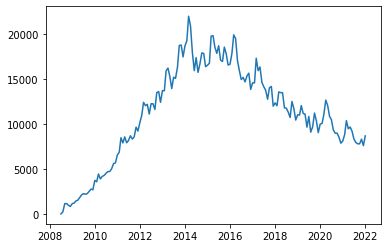

In [163]:
plot = plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

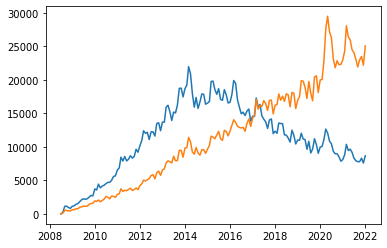

In [223]:
plt.plot(reshaped_df.index, reshaped_df['java'],
                reshaped_df.index, reshaped_df['python'])


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

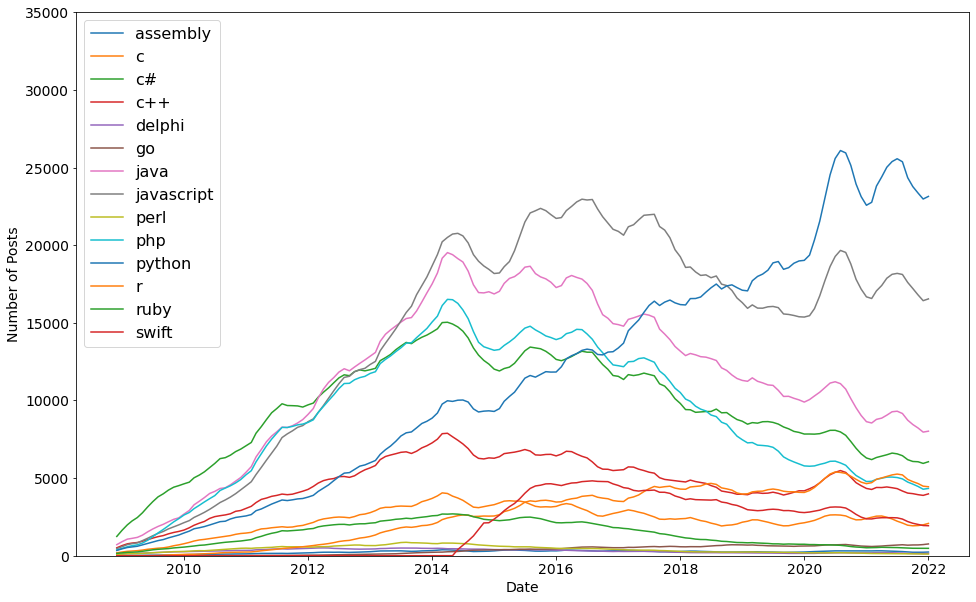

In [168]:
roll_df = reshaped_df.rolling(window=3).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plot = plt.plot(roll_df.index, roll_df[column], label=roll_df[column].name)
plt.legend(fontsize=16)